In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# 1. Load the dataset
# file_path = 'Brent_crude_oil.csv'  # Adjust the path to your file location
# data = pd.read_csv(file_path)
data = pd.read_csv('../Model is used in base paper other than compare one/2. preprocessed WTI dataset/Crude Oil WTI Futures daily.csv')




In [14]:
# 2. Check and clean column names
data.columns = data.columns.str.strip()  # Strip any leading/trailing whitespace



In [15]:
# 3. Verify if 'Date' column exists
if 'Date' not in data.columns:
    raise KeyError("The 'Date' column is missing or incorrectly named in the dataset.")



In [16]:
# data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')



# 4. Preprocess the data
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')


# Sort by date to ensure monotonic order
data = data.sort_values(by='Date')

# Set the 'Date' column as index and set a frequency (daily in this case)
data.set_index('Date', inplace=True)
data = data.asfreq('D')  # Set frequency as daily (D)

# Use only the 'Close' column
# close_prices = data['Close'].fillna(method='ffill')  # Fill missing values by forward filling
# Use only the 'Close' column and forward fill missing values
close_prices = data['Close'].ffill()  # Use ffill() for forward filling



ValueError: time data "2024-09-19" doesn't match format "%d-%m-%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [5]:
# 5. Split the data into training and test sets (80% train, 20% test)
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]



In [6]:
# 6. Build and fit the ARIMA model (ARIMA(p=5, d=1, q=0) as a starting point)
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()



In [7]:
# 7. Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))



In [8]:
# 8. Define MAPE function to handle zero values
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [9]:
# 9. Calculate MAE, RMSE, MAPE
mae = mean_absolute_error(test, predictions)
rmse = (root_mean_squared_error(test, predictions))
mape = mean_absolute_percentage_error(test, predictions)



In [10]:
# 10. Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')



Mean Absolute Error (MAE): 4.783768902701094
Root Mean Squared Error (RMSE): 5.67578366210221
Mean Absolute Percentage Error (MAPE): 5.837126877231149


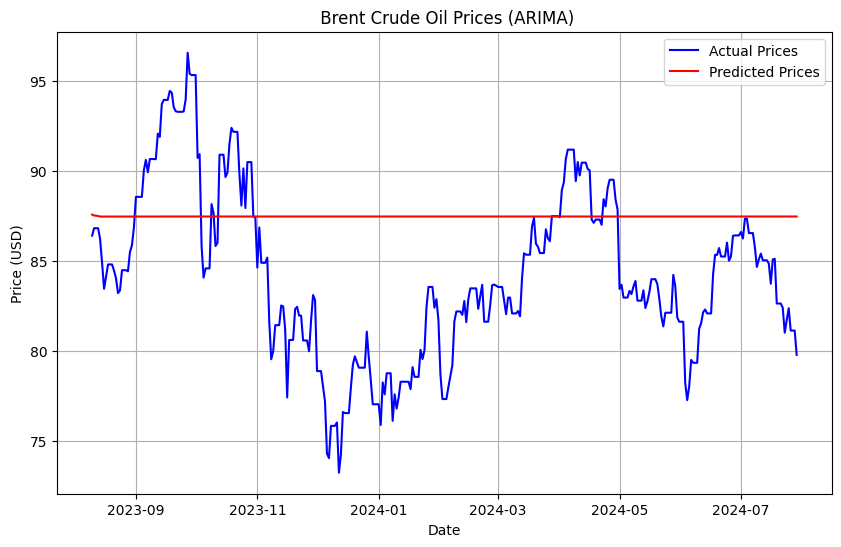

In [ ]:
# 11. Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, predictions, label='Predicted Prices', color='red')
plt.title(' WTI Crude Oil Prices (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

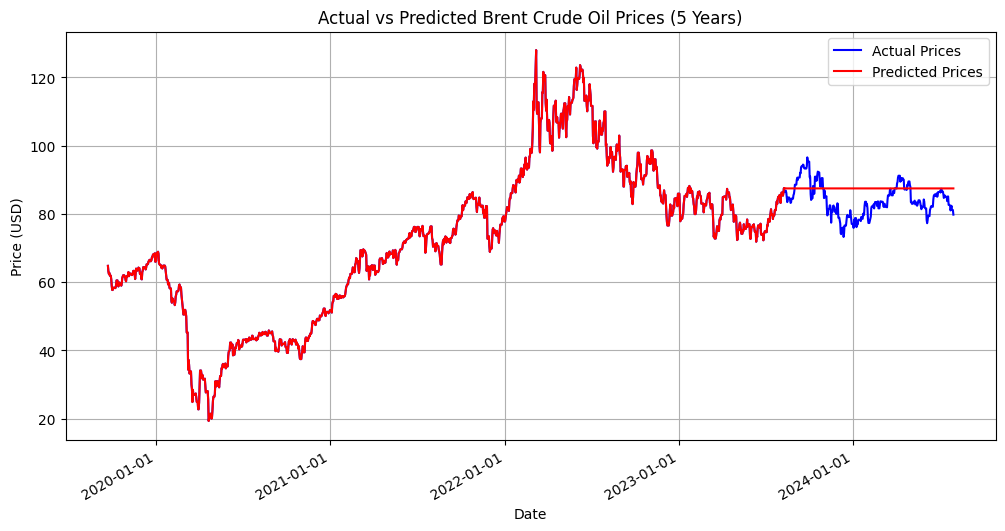

In [ ]:
import matplotlib.dates as mdates

# 1. Concatenate training, test, and predictions for visualization
full_actual = pd.concat([train, test])  # Full actual data (train + test)
full_predictions = pd.concat([train, pd.Series(predictions, index=test.index)])  # Predictions (train + predicted test)

# 2. Visualize full actual data and predictions with adjusted date formatting
plt.figure(figsize=(12, 6))
plt.plot(full_actual.index, full_actual, label='Actual Prices', color='blue')
plt.plot(full_predictions.index, full_predictions, label='Predicted Prices', color='red')

# Set date format on the x-axis
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.title('Actual vs Predicted Brent Crude Oil Prices (5 Years)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

